In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
N = 24 #размер сетки
x0 = 0 #начальные значение 
t0 = 0
x1 = math.pi/2 #конечные значения
t1 = 0.05
h = x1/N       #шаги сетки
tau = t1/N
sigma = tau/(h*h) #условие сходимости

print(sigma)

X = np.linspace(x0, x1, N+1)  #массивы для сетки
T = np.linspace(t0, t1, N+1)

0.4863416814832214


Точное решение

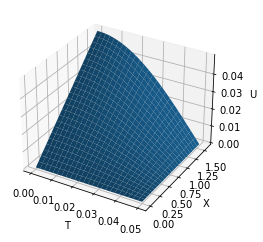

In [22]:


u_ = np.array([[U(i, j) for j in T] for i in X])  #сетка точного решения

#отрисовка точного решения
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u_))

ax.set_xlabel('T')
ax.set_ylabel('X')
ax.set_zlabel('U')
None

Явная схема(трехточечная аппроксимация со вторым порядком)

4.343535219382715e-05


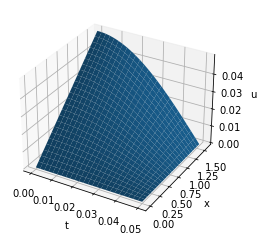

In [55]:
#сетка численного решения
u = [[0 for j in range(len(T))] for i in range(len(X))]
#первое граничное условие
for k in range(N+1):
    u[0][k] = fi0(tau*k) 
#начальное условие
for j in range(N+1):
    u[j][0] = psi(j*h)

#явное решение
for k in range(N):
    for j in range(1,N):
        u[j][k+1] = u[j][k]+tau*((u[j + 1][k] - 2 * u[j][k] + u[j - 1][k])/(h*h) +cos(j*h)*(cos(k*tau)+sin(k*tau)))
    ##u[N][k + 1] = -sin(tau * (k + 1)) * h + u[N - 1][k + 1]; #второе граничное условие
    u[N][k+1] = (2*h*fil((k+1)*tau)+4*u[N-1][k+1]-u[N-2][k+1])/3
    
#отрисовка
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u')
#подсчет ср кв ошибки
miss = sum([sum([(U(X[j],T[k])-u[j][k])*(U(X[j],T[k])-u[j][k]) for j in range(N+1)]) for k in range(N+1)])
miss = math.sqrt(miss)
print(miss)


Неявная схема(двухточечная аппроксимация со вторым порядком)

0.0008623691760478435


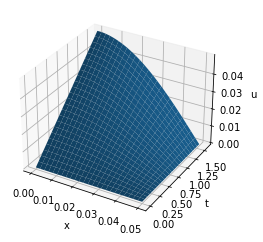

In [78]:
#сетка численного решения
u = [[0 for j in range(N+1)] for i in range(N+1)]


#первое граничное условие
for k in range(N+1):
    u[0][k] = fi0(tau*k) 
#начальное условие
for j in range(N+1):
    u[j][0] = psi(j*h)

    
for k in range(N):
    a = [0]
    b = [-2*sigma-1]
    c = [sigma]
    d = [-u[0][k]-tau*f(0,tau*(k))-sigma*fi0((k+1)*tau)]

    for j in range(2, N):
        if j!=N-1:
            a.append(sigma)
            b.append(-2*sigma-1)
            c.append(sigma)
            d.append(-u[j][k] -tau*f(j*h,(k)*tau))
        else:
            #второе граничное условие
            a.append(1)
            b.append(-(1+1/(2*sigma)))
            c.append(0)
            d.append(-h*fil(tau*(k))*h-u[N][k]/(2*sigma)-h*h*f((N-1)*h,tau*(k+1))/2)
    
            #второе граничное условие
            #a.append(-1/h)
            #b.append(1/h)
            #c.append(0)
            #d.append(-sin(tau*(k+1)))

            
    
    tmp = slau([a,b,c,d])
    
    for i in range(len(tmp)):
        u[i+1][k+1] = tmp[i]

#отрисовка
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

#подсчет ср кв ошибки
miss = sum([sum([(U(X[j],T[k])-u[j][k])*(U(X[j],T[k])-u[j][k]) for j in range(N+1)]) for k in range(N+1)])
miss = math.sqrt(miss)
print(miss)

Схема Кранка-Николсона(двухточечная аппроксимация с
первым порядком)

0.000483354590295202


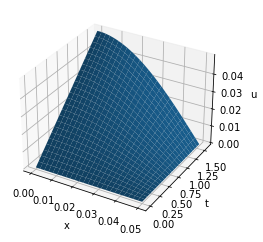

In [54]:
#сетка численного решения
u = [[0 for j in range(N+1)] for i in range(N+1)]

thetta = 1/2

#первое граничное условие
for k in range(N+1):
    u[0][k] = fi0(tau*k) 
#начальное условие
for j in range(N+1):
    u[j][0] = psi(j*h)

    
for k in range(N):
    a = [0]
    b = [-2*thetta*sigma-1]
    c = [sigma*thetta]
    d = [-u[0][k]-sigma*(1-thetta)*(u[2][k]-2*u[1][k]+u[0][k])-tau*f(0,tau*(k))-thetta*sigma*fi0((k+1)*tau)]
    
    for j in range(2, N):
        if j!=N-1:
            a.append(sigma*thetta)
            b.append(-2*thetta*sigma-1)
            c.append(sigma*thetta)
            d.append(-u[j][k] - sigma*(1-thetta)*(u[j+1][k]-2*u[j][k]+u[j-1][k])-tau*f(j*h,(k)*tau))
        else:
            #второе граничное условие
            a.append(-1/h)
            b.append(1/h)
            c.append(0)
            d.append(fil(tau*(k+1)))
    

    tmp = slau([a,b,c,d])
    
    for i in range(len(tmp)):
        u[i+1][k+1] = tmp[i]
   
#отрисовка
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

#подсчет ср кв ошибки
miss = sum([sum([(U(X[j],T[k])-u[j][k])*(U(X[j],T[k])-u[j][k]) for j in range(N+1)]) for k in range(N+1)])
miss = math.sqrt(miss)
print(miss)



In [ ]:
def printarr(arr):
    for i in range(len(arr)):
        s = ""
        for j in range(len(arr[i])):
            s += str(round(arr[i][j],3))+" "
        print(s)
    

In [20]:
def fi0(t):
    return sin(t)

def fil(t):
    return -sin(t)

def psi(x):
    return 0

def U(x,t):
    return cos(x)*sin(t)

def f(x, t):
    return cos(x)*(sin(t)+cos(t))

def cos(x):
    return math.cos(x)

def sin(x):
    return math.sin(x)

In [42]:
def slau(a_):
  
    a = a_[0]
    b = a_[1]
    c = a_[2]
    d = a_[3]

    for i in range(len(a)):
        if math.fabs(b[i]) < math.fabs(a[i]) + math.fabs(c[i]):
            raise Exception("LOL"+str(i))

    
    #прямой ход
    P,Q = [-c[0]/b[0]],[d[0]/b[0]]
    for i in range(1,len(a)):
        P.append(-c[i]/(b[i]+a[i]*P[i-1]))
        Q.append((d[i]-a[i]*Q[i-1])/(b[i]+a[i]*P[i-1]))
        
    #обратный ход
    x = [Q[-1]]
    for i in range(1,len(a)):
        x.append(P[len(a)-i-1]*x[i-1]+Q[len(a)-i-1])
    
    
    x = list(reversed(x))
    
    return x